In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.special import comb
import os

In [2]:
class RashomonPlotter:
    """Class for creating visualizations of the Rashomon Effect."""
    
    def __init__(self, data_dir: str = '../data', plot_dir: str = '../plots'):
        """
        Initialize the plotter.
        
        Parameters:
        -----------
        data_dir : str
            Directory containing the result CSV files
        plot_dir : str
            Directory to save plots
        """
        self.data_dir = data_dir
        self.plot_dir = plot_dir
        
        # Create plot directory if it doesn't exist
        os.makedirs(plot_dir, exist_ok=True)
        
        # Load data
        self.results = pd.read_csv(os.path.join(data_dir, 'result.csv'))
        self.detailed_results = pd.read_csv(os.path.join(data_dir, 'detailed_results.csv'))
        
        # Set style
        plt.style.use('seaborn-v0_8-whitegrid')
        sns.set_palette("husl")
        
    def plot_rashomon_1pct(self):
        """Create plot for 1% threshold Rashomon set."""
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot data
        ax.plot(self.results['sample_size'], 
                self.results['n_models_rashomon'], 
                'o-', markersize=8, linewidth=2, color='darkblue')
        
        # Formatting
        ax.set_xlabel('Sample Size', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Models in Rashomon Set', fontsize=12, fontweight='bold')
        ax.set_title('The Rashomon Effect in Linear Regression', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.text(0.5, 0.95, 'Number of 5-variable models within 1% of the best model\'s RSS',
                ha='center', va='top', transform=ax.transAxes, fontsize=12)
        
        # Set x-axis ticks to actual sample sizes
        ax.set_xticks(self.results['sample_size'])
        ax.set_xticklabels([f'{x:,}' for x in self.results['sample_size']])
        
        # Add grid
        ax.grid(True, alpha=0.3)
        
        # Add caption
        fig.text(0.99, 0.01, 'Based on Breiman (2001): Statistical Modeling: The Two Cultures',
                ha='right', va='bottom', fontsize=9, style='italic')
        
        plt.tight_layout()
        
        # Save
        filename = os.path.join(self.plot_dir, 'rashomon_effect_1pct.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved plot: {filename}")
        
        plt.show()
        
    def plot_multiple_thresholds(self):
        """Create plot showing multiple thresholds."""
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Get unique thresholds and assign colors
        thresholds = sorted(self.detailed_results['threshold'].unique())
        colors = plt.cm.plasma(np.linspace(0, 0.9, len(thresholds)))
        
        # Plot each threshold
        for i, threshold in enumerate(thresholds):
            data = self.detailed_results[self.detailed_results['threshold'] == threshold]
            ax.plot(data['sample_size'], data['n_models'], 
                   'o-', markersize=6, linewidth=2, 
                   color=colors[i], label=f'{int(threshold*100)}%')
        
        # Use log scale for y-axis
        ax.set_yscale('log')
        
        # Formatting
        ax.set_xlabel('Sample Size', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Models (log scale)', fontsize=12, fontweight='bold')
        ax.set_title('Rashomon Set Size at Different Thresholds', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.text(0.5, 0.95, 'Number of 5-variable models within various % of the best model\'s RSS',
                ha='center', va='top', transform=ax.transAxes, fontsize=12)
        
        # Set x-axis ticks
        unique_samples = sorted(self.detailed_results['sample_size'].unique())
        ax.set_xticks(unique_samples)
        ax.set_xticklabels([f'{x:,}' for x in unique_samples])
        
        # Add legend
        ax.legend(title='Threshold (%)', loc='best', fontsize=10)
        
        # Add grid
        ax.grid(True, alpha=0.3)
        
        # Add caption
        fig.text(0.99, 0.01, 'Note: y-axis is on log scale',
                ha='right', va='bottom', fontsize=9, style='italic')
        
        plt.tight_layout()
        
        # Save
        filename = os.path.join(self.plot_dir, 'rashomon_effect_multiple_thresholds.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved plot: {filename}")
        
        plt.show()
        
    def print_summary(self):
        """Print summary statistics."""
        print("\nSummary of Rashomon Effect:")
        print("===========================")
        
        # Summary for 1% threshold
        print("\nFor 1% threshold:")
        for _, row in self.results.iterrows():
            print(f"Sample size {row['sample_size']:,}: {row['n_models_rashomon']} models within 1% of best")
        
        # Create pivot table for all thresholds
        print("\n\nDetailed summary by threshold:")
        pivot_table = self.detailed_results.pivot(
            index='sample_size', 
            columns='threshold', 
            values='n_models'
        )
        print(pivot_table)
        
        # Calculate total possible models
        total_models = int(comb(30, 5))
        print(f"\n\nTotal possible 5-variable models: {total_models:,}")
        
        # Show percentage for 50% threshold
        print("\nPercentage of all possible models in Rashomon set (50% threshold):")
        fifty_pct = self.detailed_results[self.detailed_results['threshold'] == 0.5]
        for _, row in fifty_pct.iterrows():
            pct = (row['n_models'] / total_models) * 100
            print(f"Sample size {row['sample_size']:,}: {pct:.1f}% of all possible models")
        
        # Analyze trend
        print("\n\nTrend analysis:")
        # Simple correlation between log(sample_size) and number of models
        corr = np.corrcoef(
            np.log(self.results['sample_size']), 
            self.results['n_models_rashomon']
        )[0, 1]
        
        if corr < -0.3:
            print("As sample size increases, the Rashomon set size decreases")
        elif corr > 0.3:
            print("As sample size increases, the Rashomon set size increases")
        else:
            print("No clear trend between sample size and Rashomon set size")

In [3]:
def main():
    """Main function to create all plots and summaries."""
    plotter = RashomonPlotter()
    
    # Create plots
    plotter.plot_rashomon_1pct()
    plotter.plot_multiple_thresholds()
    
    # Print summary
    plotter.print_summary()


Saved plot: ../plots/rashomon_effect_1pct.png


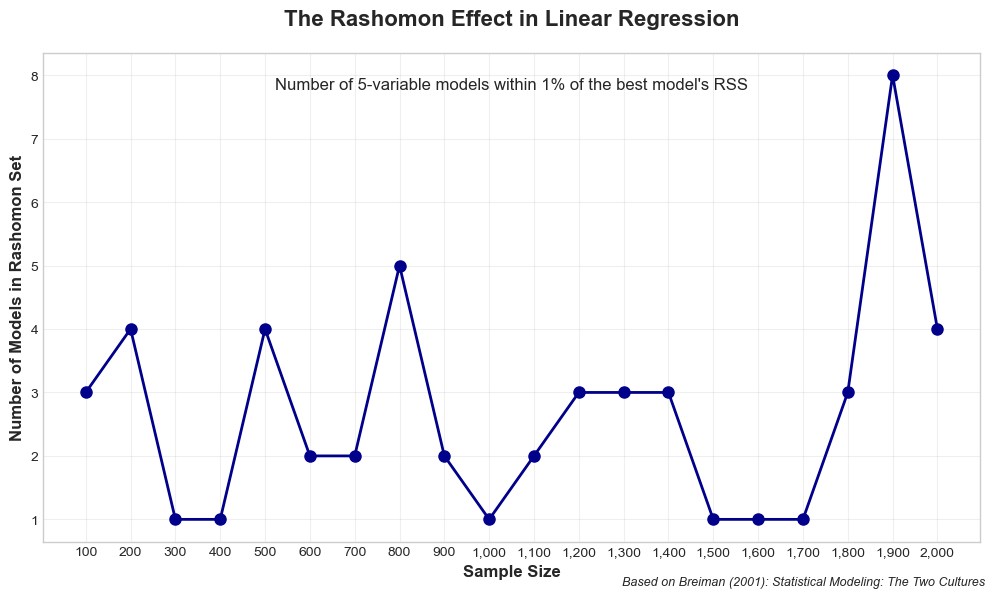

Saved plot: ../plots/rashomon_effect_multiple_thresholds.png


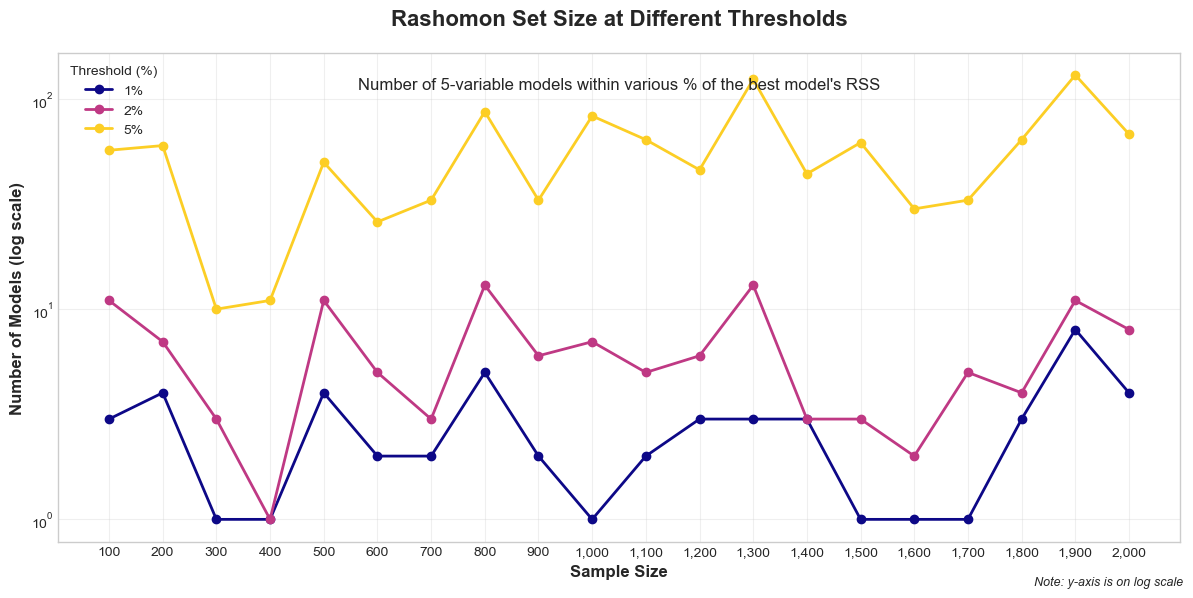


Summary of Rashomon Effect:

For 1% threshold:
Sample size 100: 3 models within 1% of best
Sample size 200: 4 models within 1% of best
Sample size 300: 1 models within 1% of best
Sample size 400: 1 models within 1% of best
Sample size 500: 4 models within 1% of best
Sample size 600: 2 models within 1% of best
Sample size 700: 2 models within 1% of best
Sample size 800: 5 models within 1% of best
Sample size 900: 2 models within 1% of best
Sample size 1,000: 1 models within 1% of best
Sample size 1,100: 2 models within 1% of best
Sample size 1,200: 3 models within 1% of best
Sample size 1,300: 3 models within 1% of best
Sample size 1,400: 3 models within 1% of best
Sample size 1,500: 1 models within 1% of best
Sample size 1,600: 1 models within 1% of best
Sample size 1,700: 1 models within 1% of best
Sample size 1,800: 3 models within 1% of best
Sample size 1,900: 8 models within 1% of best
Sample size 2,000: 4 models within 1% of best


Detailed summary by threshold:
threshold    0.01

In [4]:
if __name__ == "__main__":
    main()